In [125]:
import pickle
def save_data(name, data):
    with open(name, 'wb') as f:
        pickle.dump(data, f)
        f.close()
def load_data(name):
    return pickle.load(open(name, 'rb'))

In [126]:
import pandas as pd
# read data
df = pd.read_csv('./news_10_category_cleaned_6k.csv')

In [127]:
X = df['text']
y = df['category']

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [129]:
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(X)

In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['category'])

In [131]:
import pandas as pd
df = pd.DataFrame({'text': X, 'category': y})

In [199]:
from pycaret.classification import *

In [33]:
s = setup(df, target = 'category', session_id=123)

,Description,Value
0,Session id,123
1,Target,category
2,Target type,Multiclass
3,Original data shape,"(5761, 2)"
4,Transformed data shape,"(5761, 2)"
5,Transformed train set shape,"(4032, 2)"
6,Transformed test set shape,"(1729, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


In [34]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [38]:
exp.setup(df,text_features=['text'], target='category', session_id=123)

,Description,Value
0,Session id,123
1,Target,category
2,Target type,Multiclass
3,Original data shape,"(5761, 2)"
4,Transformed data shape,"(5761, 14448)"
5,Transformed train set shape,"(4032, 14448)"
6,Transformed test set shape,"(1729, 14448)"
7,Text features,1
8,Preprocess,True
9,Imputation type,simple


In [39]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.2230
knn,K Neighbors Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0090
nb,Naive Bayes,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0060
dt,Decision Tree Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0060
ridge,Ridge Classifier,0.1369,0.0000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0060
rf,Random Forest Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0320
ada,Ada Boost Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0190
gbc,Gradient Boosting Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.1600
lda,Linear Discriminant Analysis,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0070
et,Extra Trees Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0300


### Analyze Model

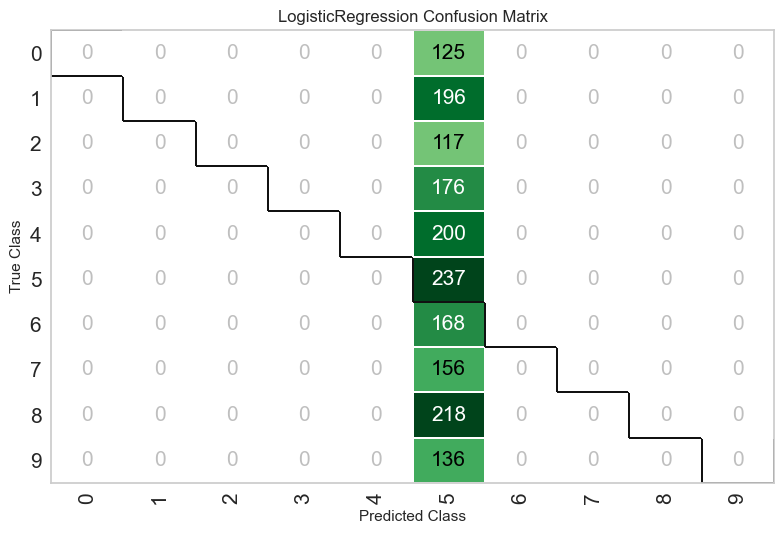

In [40]:
plot_model(best, plot='confusion_matrix')

### Follow the nlp tutorial https://github.com/prateek025/nlp-using-pycaret/blob/master/Spam-Ham.ipynb

In [135]:
df = pd.read_csv('./news_10_category_cleaned_6k.csv')
df.columns

Index(['category', 'text'], dtype='object')

In [136]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

In [137]:
#df = pd.get_dummies(df, columns=['category'], drop_first=True)
df.head()

,category,text
0,4,dad just stressed mom according new poll
1,6,everything need know makeup expiration date vi...
2,4,mother day 2013 photo challenge see way child ...
3,5,since sandra bland hundred suicide american ja...
4,9,disabled prisoner raped abused kept solitary a...


In [138]:
df1 = df
X = df1['text']
Y = df1['category']

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

In [140]:
# BOW-TF Embedding
no_features = 1000
c_vectorizer = CountVectorizer(max_df=0.8, min_df=0.015, max_features=no_features, ngram_range=[1,3])
c_vectors = c_vectorizer.fit_transform(X)
print(f"shape of BOW-TF embedding: {c_vectors.shape}")

shape of BOW-TF embedding: (5761, 119)


In [144]:
save_data('cv_vectors.pickle', c_vectors)
save_data('y.pickle', Y)

In [143]:
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer()
tf_vectors = tfidf_vectorizer.fit_transform(X)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")

shape of TF-IDF embedding: (5761, 17601)


In [145]:
save_data('tfidf_vectors.pickle', tf_vectors)

In [147]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    #print(f'y_pred:{Y_pred}')
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'd', cmap='RdBu',
                xticklabels=set(Y_test), yticklabels=set(Y_test))
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    report_dict = classification_report(Y_test, Y_pred, output_dict=True)
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred), 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='macro'), 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='macro'), 2))
    print("F1 Score : ", round(f1_score(Y_test, Y_pred, average='macro'), 2))
    #preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    #fpr, tpr, threshold = roc_curve(Y_test, preds)
    #roc_auc = auc(fpr, tpr)
    #print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    #plt.figure()
    #plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    #plt.plot([0.0, 1.0], [0, 1],'r--')
    #plt.xlim([-0.1, 1.1])
    #plt.ylim([-0.1, 1.1])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('RoC-AUC on Test Data')
    #plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    #plt.show()
    return round(accuracy_score(Y_test, Y_pred), 4), round(precision_score(Y_test, Y_pred, average='macro'), 4), round(recall_score(Y_test, Y_pred, average='macro'), 4), round(f1_score(Y_test, Y_pred, average='macro'), 4), report_dict

In [180]:
def model_dvt(X, Y):
    
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    report_dict = {}
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    
    print("\n", 'Logistic Regression')
    clf = LogisticRegression(random_state=21)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    accuracy, precision, recall, f1, report = clf_report(Y_test, Y_pred, probs)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    report_dict.update({'Logistic Regression': report})
    
    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    accuracy, precision, recall, f1, report = clf_report(Y_test, Y_pred, probs)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    report_dict.update({'Random Forest Classifier': report})
    
    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    accuracy, precision, recall, f1, report = clf_report(Y_test, Y_pred, probs)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    report_dict.update({'AdaBoost Classifier': report})
    
    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    accuracy, precision, recall, f1, report = clf_report(Y_test, Y_pred, probs)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    report_dict.update({'Grdient Boosting Classifier': report})
    
    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    accuracy, precision, recall, f1, report = clf_report(Y_test, Y_pred, probs)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    report_dict.update({'Naive Bayes Classifier': report})
    
    return accuracy_list, precision_list, recall_list, f1_list, report_dict

# plot all scores in one plot
def plot_overall_scores(accuracy_list, precision_list, recall_list, f1_list):
    plt.figure(figsize=(10, 5))
    plt.plot(['Logistic Regression', 'Random Forest Classifier', 'AdaBoost Classifier', 'Grdient Boosting Classifier', 'Naive Bayes Classifier'], accuracy_list, label='Accuracy')
    plt.plot(['Logistic Regression', 'Random Forest Classifier', 'AdaBoost Classifier', 'Grdient Boosting Classifier', 'Naive Bayes Classifier'], precision_list, label='Precision')
    plt.plot(['Logistic Regression', 'Random Forest Classifier', 'AdaBoost Classifier', 'Grdient Boosting Classifier', 'Naive Bayes Classifier'], recall_list, label='Recall')
    plt.plot(['Logistic Regression', 'Random Forest Classifier', 'AdaBoost Classifier', 'Grdient Boosting Classifier', 'Naive Bayes Classifier'], f1_list, label='F1')
    plt.legend()
    plt.show()

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (4608, 119)
Test Data Dimensions :  (1153, 119)

 Logistic Regression

 Confusion Matrix


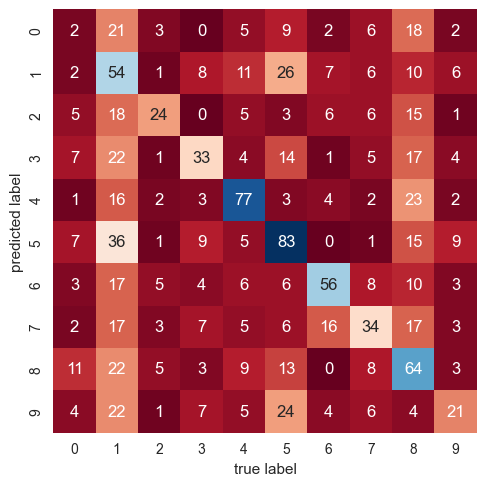


 Classification Report 

Overall Accuracy :  0.39
Precision Score :  0.4
Recall Score :  0.36
F1 Score :  0.36

 Random Forest Classifier

 Confusion Matrix


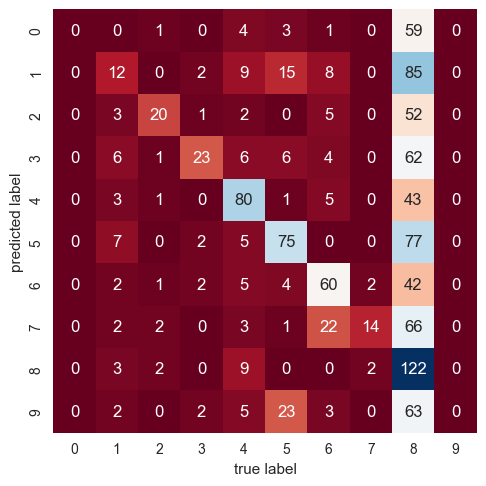


 Classification Report 

Overall Accuracy :  0.35
Precision Score :  0.45
Recall Score :  0.31
F1 Score :  0.3

 AdaBoost Classifier

 Confusion Matrix


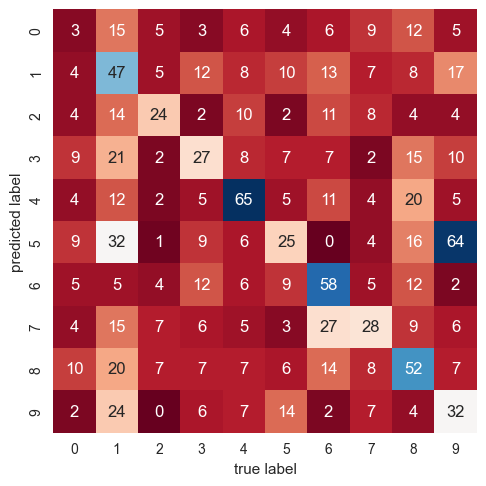


 Classification Report 

Overall Accuracy :  0.31
Precision Score :  0.31
Recall Score :  0.3
F1 Score :  0.3

 Grdient Boosting Classifier

 Confusion Matrix


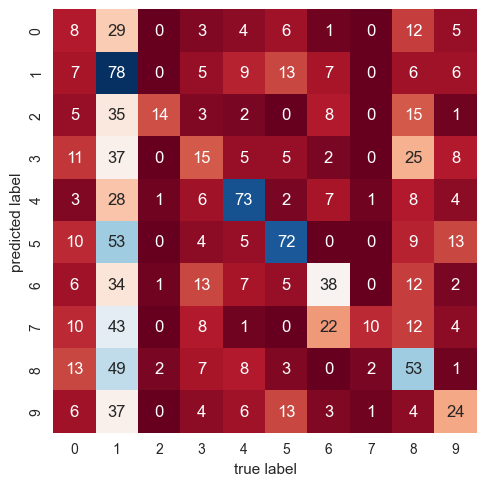


 Classification Report 

Overall Accuracy :  0.33
Precision Score :  0.43
Recall Score :  0.3
F1 Score :  0.31

 Naive Bayes Classifier

 Confusion Matrix


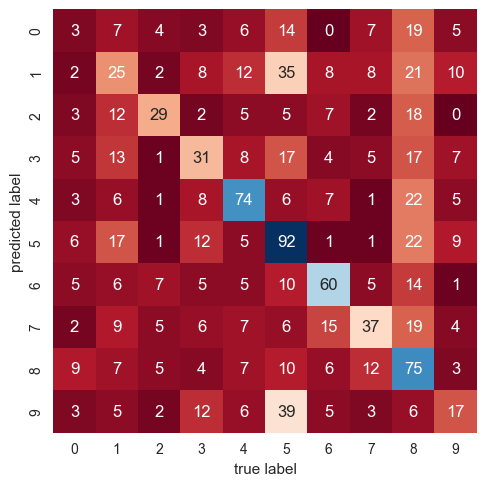


 Classification Report 

Overall Accuracy :  0.38
Precision Score :  0.37
Recall Score :  0.35
F1 Score :  0.35


In [181]:
print('Models on Term Frequency - Bag of Words data')
a_list, p_list, r_list, f_list, rp_list = model_dvt(c_vectors, Y)

In [170]:
le.inverse_transform([int('0')])

array(['BUSINESS & FINANCES'], dtype=object)

In [172]:
idx2category = {i:le.inverse_transform([int(i)])[0] for i in set(Y)}
idx2category

{0: 'BUSINESS & FINANCES',
 1: 'ENTERTAINMENT',
 2: 'FOOD & DRINK',
 3: 'GROUPS VOICES',
 4: 'PARENTING',
 5: 'POLITICS',
 6: 'STYLE & BEAUTY',
 7: 'TRAVEL',
 8: 'WELLNESS',
 9: 'WORLD NEWS'}

In [182]:
rp_list

{'Logistic Regression': {'0': {'precision': 0.045454545454545456,
   'recall': 0.029411764705882353,
   'f1-score': 0.03571428571428571,
   'support': 68},
  '1': {'precision': 0.22040816326530613,
   'recall': 0.4122137404580153,
   'f1-score': 0.2872340425531915,
   'support': 131},
  '2': {'precision': 0.5217391304347826,
   'recall': 0.2891566265060241,
   'f1-score': 0.37209302325581395,
   'support': 83},
  '3': {'precision': 0.44594594594594594,
   'recall': 0.3055555555555556,
   'f1-score': 0.3626373626373627,
   'support': 108},
  '4': {'precision': 0.5833333333333334,
   'recall': 0.5789473684210527,
   'f1-score': 0.5811320754716981,
   'support': 133},
  '5': {'precision': 0.44385026737967914,
   'recall': 0.5,
   'f1-score': 0.4702549575070821,
   'support': 166},
  '6': {'precision': 0.5833333333333334,
   'recall': 0.4745762711864407,
   'f1-score': 0.5233644859813085,
   'support': 118},
  '7': {'precision': 0.4146341463414634,
   'recall': 0.3090909090909091,
   'f1-s

In [183]:
categories = idx2category.values()
categories

dict_values(['BUSINESS & FINANCES', 'ENTERTAINMENT', 'FOOD & DRINK', 'GROUPS VOICES', 'PARENTING', 'POLITICS', 'STYLE & BEAUTY', 'TRAVEL', 'WELLNESS', 'WORLD NEWS'])

In [187]:
rp_list['Logistic Regression']['0']['precision']

0.045454545454545456

In [193]:
for model in rp_list.keys():
    for category in rp_list[model].keys():
        if category == 'accuracy':
            print(f'accuracy {rp_list[model][category]}')
        elif category in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
            print(f'{model} - {category}-{rp_list[model][category]["precision"]}')
        else:
            continue

Logistic Regression - 0-0.045454545454545456
Logistic Regression - 1-0.22040816326530613
Logistic Regression - 2-0.5217391304347826
Logistic Regression - 3-0.44594594594594594
Logistic Regression - 4-0.5833333333333334
Logistic Regression - 5-0.44385026737967914
Logistic Regression - 6-0.5833333333333334
Logistic Regression - 7-0.4146341463414634
Logistic Regression - 8-0.3316062176165803
Logistic Regression - 9-0.3888888888888889
accuracy 0.388551604509974
Random Forest Classifier - 0-0.0
Random Forest Classifier - 1-0.3
Random Forest Classifier - 2-0.7142857142857143
Random Forest Classifier - 3-0.71875
Random Forest Classifier - 4-0.625
Random Forest Classifier - 5-0.5859375
Random Forest Classifier - 6-0.5555555555555556
Random Forest Classifier - 7-0.7777777777777778
Random Forest Classifier - 8-0.18181818181818182
Random Forest Classifier - 9-0.0
accuracy 0.3521248915871639
AdaBoost Classifier - 0-0.05555555555555555
AdaBoost Classifier - 1-0.22926829268292684
AdaBoost Classifier

In [ ]:
plot_overall_scores(a_list, p_list, r_list, f_list)

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (4608, 17601)
Test Data Dimensions :  (1153, 17601)

 Logistic Regression

 Confusion Matrix


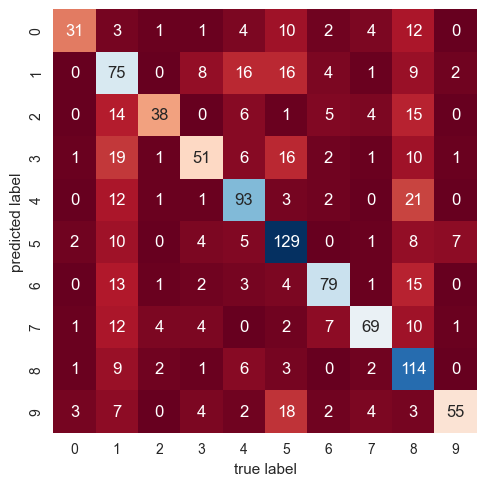


 Classification Report 

              precision    recall  f1-score   support

           0       0.79      0.46      0.58        68
           1       0.43      0.57      0.49       131
           2       0.79      0.46      0.58        83
           3       0.67      0.47      0.55       108
           4       0.66      0.70      0.68       133
           5       0.64      0.78      0.70       166
           6       0.77      0.67      0.71       118
           7       0.79      0.63      0.70       110
           8       0.53      0.83      0.64       138
           9       0.83      0.56      0.67        98

    accuracy                           0.64      1153
   macro avg       0.69      0.61      0.63      1153
weighted avg       0.67      0.64      0.64      1153

Overall Accuracy :  0.64
Precision Score :  0.69
Recall Score :  0.61
--------------------------------------------------------------------------

 Random Forest Classifier

 Confusion Matrix


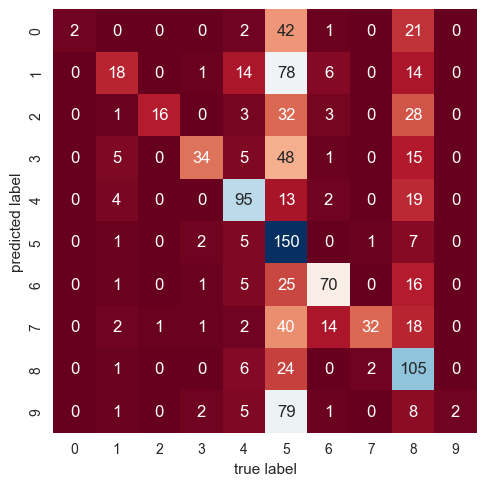


 Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        68
           1       0.53      0.14      0.22       131
           2       0.94      0.19      0.32        83
           3       0.83      0.31      0.46       108
           4       0.67      0.71      0.69       133
           5       0.28      0.90      0.43       166
           6       0.71      0.59      0.65       118
           7       0.91      0.29      0.44       110
           8       0.42      0.76      0.54       138
           9       1.00      0.02      0.04        98

    accuracy                           0.45      1153
   macro avg       0.73      0.40      0.38      1153
weighted avg       0.68      0.45      0.41      1153

Overall Accuracy :  0.45
Precision Score :  0.73
Recall Score :  0.4
--------------------------------------------------------------------------

 AdaBoost Classifier

 Confusion Matrix


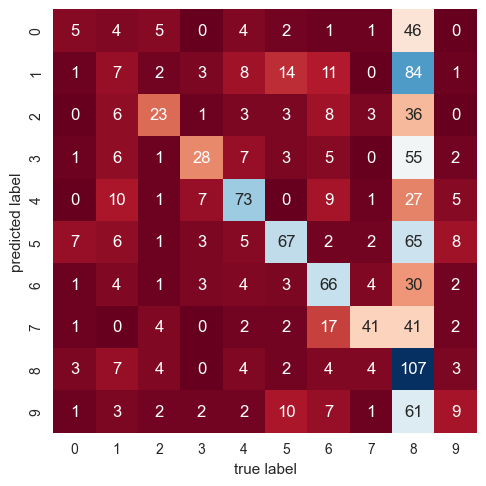


 Classification Report 

              precision    recall  f1-score   support

           0       0.25      0.07      0.11        68
           1       0.13      0.05      0.08       131
           2       0.52      0.28      0.36        83
           3       0.60      0.26      0.36       108
           4       0.65      0.55      0.60       133
           5       0.63      0.40      0.49       166
           6       0.51      0.56      0.53       118
           7       0.72      0.37      0.49       110
           8       0.19      0.78      0.31       138
           9       0.28      0.09      0.14        98

    accuracy                           0.37      1153
   macro avg       0.45      0.34      0.35      1153
weighted avg       0.46      0.37      0.37      1153

Overall Accuracy :  0.37
Precision Score :  0.45
Recall Score :  0.34
--------------------------------------------------------------------------

 Grdient Boosting Classifier

 Confusion Matrix


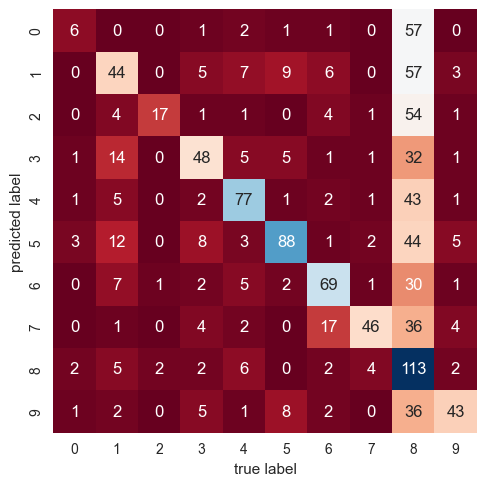


 Classification Report 

              precision    recall  f1-score   support

           0       0.43      0.09      0.15        68
           1       0.47      0.34      0.39       131
           2       0.85      0.20      0.33        83
           3       0.62      0.44      0.52       108
           4       0.71      0.58      0.64       133
           5       0.77      0.53      0.63       166
           6       0.66      0.58      0.62       118
           7       0.82      0.42      0.55       110
           8       0.23      0.82      0.35       138
           9       0.70      0.44      0.54        98

    accuracy                           0.48      1153
   macro avg       0.62      0.44      0.47      1153
weighted avg       0.62      0.48      0.49      1153

Overall Accuracy :  0.48
Precision Score :  0.62
Recall Score :  0.44
--------------------------------------------------------------------------

 Naive Bayes Classifier

 Confusion Matrix


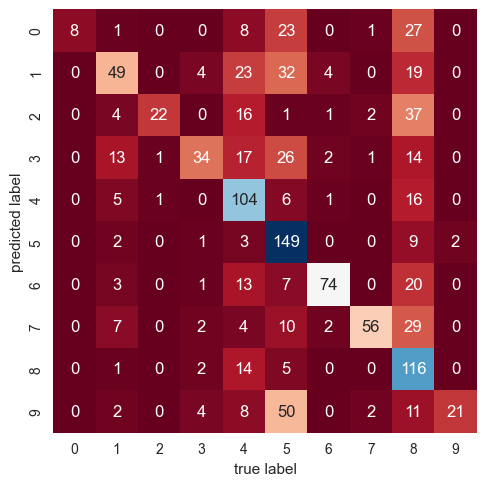


 Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.12      0.21        68
           1       0.56      0.37      0.45       131
           2       0.92      0.27      0.41        83
           3       0.71      0.31      0.44       108
           4       0.50      0.78      0.61       133
           5       0.48      0.90      0.63       166
           6       0.88      0.63      0.73       118
           7       0.90      0.51      0.65       110
           8       0.39      0.84      0.53       138
           9       0.91      0.21      0.35        98

    accuracy                           0.55      1153
   macro avg       0.73      0.49      0.50      1153
weighted avg       0.68      0.55      0.52      1153

Overall Accuracy :  0.55
Precision Score :  0.73
Recall Score :  0.49
--------------------------------------------------------------------------


In [124]:
print('Models on Term Frequency - Bag of Words data')
model_dvt(tf_vectors, Y)

### PyCaret for Multi-class classification

In [194]:
df = pd.read_csv('./news_10_category_cleaned_6k.csv')

In [200]:
from pycaret.classification import *

In [201]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [203]:
su_1 = setup(data = df, target = 'category', text_features=['text'], text_features_method="tf-idf", max_encoding_ohe=10, session_id=21) 

,Description,Value
0,Session id,21
1,Target,category
2,Target type,Multiclass
3,Target mapping,"BUSINESS & FINANCES: 0, ENTERTAINMENT: 1, FOOD & DRINK: 2, GROUPS VOICES: 3, PARENTING: 4, POLITICS: 5, STYLE & BEAUTY: 6, TRAVEL: 7, WELLNESS: 8, WORLD NEWS: 9"
4,Original data shape,"(5761, 2)"
5,Transformed data shape,"(5761, 14563)"
6,Transformed train set shape,"(4032, 14563)"
7,Transformed test set shape,"(1729, 14563)"
8,Text features,1
9,Preprocess,True


In [205]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6560,0.0000,0.6560,0.6578,0.6534,0.6149,0.6157,1.9250
lr,Logistic Regression,0.6290,0.9234,0.6290,0.6567,0.6254,0.5826,0.5862,4.5790
svm,SVM - Linear Kernel,0.6252,0.0000,0.6252,0.6291,0.6217,0.5809,0.5821,2.4720
et,Extra Trees Classifier,0.6099,0.9022,0.6099,0.6307,0.6079,0.5624,0.5650,3.0240
rf,Random Forest Classifier,0.5833,0.8919,0.5833,0.6124,0.5824,0.5324,0.5360,1.9770
gbc,Gradient Boosting Classifier,0.5789,0.8763,0.5789,0.6070,0.5838,0.5282,0.5311,63.7120
knn,K Neighbors Classifier,0.5181,0.8292,0.5181,0.5378,0.5194,0.4618,0.4634,0.7980
lightgbm,Light Gradient Boosting Machine,0.4814,0.8373,0.4814,0.4852,0.4796,0.4194,0.4201,3.4660
dt,Decision Tree Classifier,0.4660,0.7012,0.4660,0.4721,0.4644,0.4024,0.4034,1.6840
nb,Naive Bayes,0.4457,0.6892,0.4457,0.4564,0.4436,0.3783,0.3794,0.7080


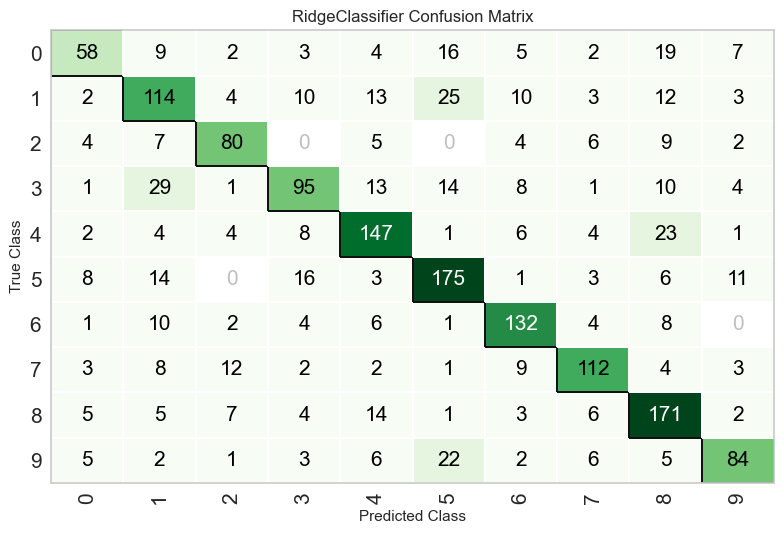

In [206]:
plot_model(best, plot='confusion_matrix')

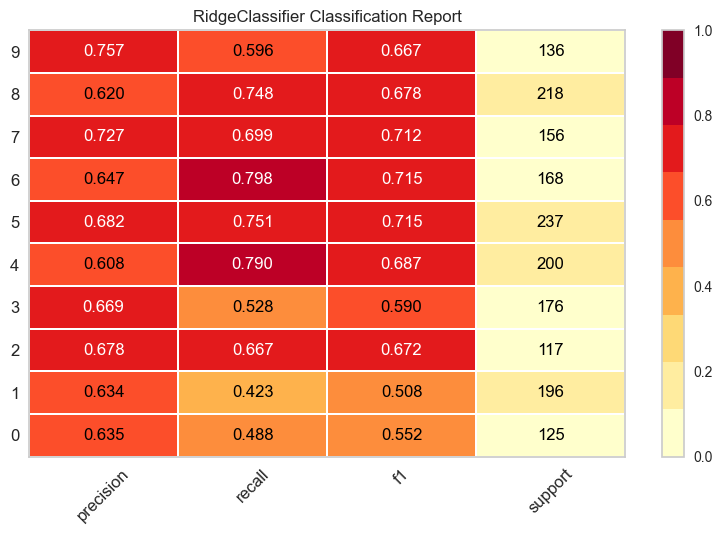

In [211]:
plot_model(best, plot='class_report')

In [207]:
su_2 = setup(data = df, target = 'category', text_features=['text'], text_features_method="bow", max_encoding_ohe=10, session_id=21) 
best_bow = compare_models()

,Description,Value
0,Session id,21
1,Target,category
2,Target type,Multiclass
3,Target mapping,"BUSINESS & FINANCES: 0, ENTERTAINMENT: 1, FOOD & DRINK: 2, GROUPS VOICES: 3, PARENTING: 4, POLITICS: 5, STYLE & BEAUTY: 6, TRAVEL: 7, WELLNESS: 8, WORLD NEWS: 9"
4,Original data shape,"(5761, 2)"
5,Transformed data shape,"(5761, 14563)"
6,Transformed train set shape,"(4032, 14563)"
7,Transformed test set shape,"(1729, 14563)"
8,Text features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6143,0.9077,0.6143,0.6242,0.6138,0.5680,0.5691,3.6210
et,Extra Trees Classifier,0.6064,0.8988,0.6064,0.6232,0.6041,0.5587,0.5610,2.7980
gbc,Gradient Boosting Classifier,0.5853,0.8788,0.5853,0.6291,0.5915,0.5349,0.5401,63.1430
ridge,Ridge Classifier,0.5838,0.0000,0.5838,0.5897,0.5834,0.5342,0.5349,2.0290
rf,Random Forest Classifier,0.5741,0.8924,0.5741,0.6126,0.5746,0.5219,0.5267,2.0480
svm,SVM - Linear Kernel,0.5717,0.0000,0.5717,0.5811,0.5707,0.5208,0.5219,1.5440
lightgbm,Light Gradient Boosting Machine,0.5040,0.8491,0.5040,0.5095,0.5031,0.4449,0.4456,3.2700
dt,Decision Tree Classifier,0.4692,0.7029,0.4692,0.4783,0.4672,0.4058,0.4073,1.5910
nb,Naive Bayes,0.4611,0.7016,0.4611,0.4668,0.4605,0.3970,0.3975,0.5410
ada,Ada Boost Classifier,0.4105,0.6535,0.4105,0.5297,0.3997,0.3334,0.3796,3.5140


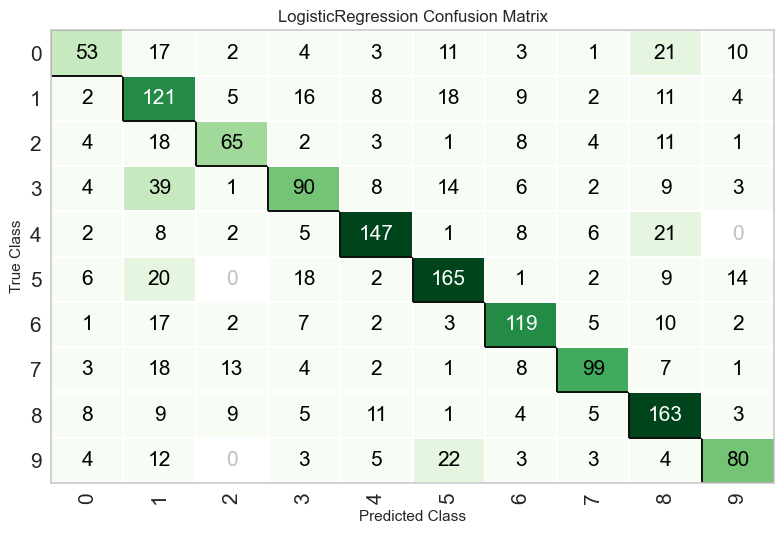

In [208]:
plot_model(best_bow, plot='confusion_matrix')

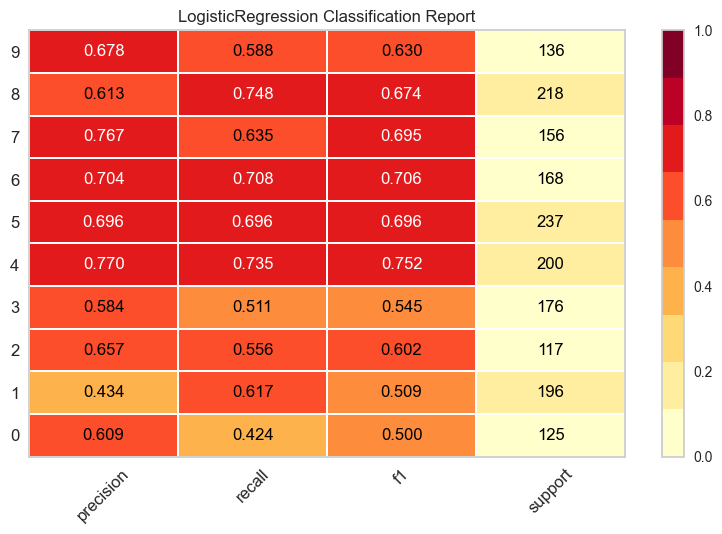

In [210]:
plot_model(best_bow, plot='class_report')

In [2]:
import spacy

# Load the pre-trained spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Process a text to extract named entities
text = "When was The Godfather released?"
doc = nlp(text)

# Iterate over named entities in the document
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: Godfather, Label: PERSON
